# > Redes Neurais Artificiais

Atividade de GCC128 - Inteligência Artificial

Aluno: Thiago Odilon de Almeida - 202021025

Após considerar a rede neural que foi passada, o primeiro passo é escrever uma função para simular a rede neural fazendo o uso da função ***sigmoidal(x)*** e ***relu(x)*** que é a função de transferência de unidade linear retificada e também já definimos a ***matrizErros***


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def sigmoidal(x):
  return 1/(1 + np.exp(-x))

def relu(x):
  if x >= 0:
    return x
  else:
    return 0

matrizErros = [
    [],
    [0, 0, 3.0, -4.0, -1.0],
    [0, 0, 0, 1.0, -3.0],
    [0, 0, 0, 0, 0, 2.0],
    [0, 0, 0, 0, 0, -10.0],
]

def a5(x):
  return x

def a4(x):
  return sigmoidal(a5(x) * matrizErros[4][5])

def a3(x):
  return sigmoidal(a5(x) * matrizErros[3][5])

def a2(x):
  return relu((a3(x) * matrizErros[2][3]) + (a4(x) * matrizErros[2][4]))

def a1(x):
  return sigmoidal(a2(x) * matrizErros[1][2] + a3(x) * matrizErros[1][3] + a4(x) * matrizErros[1][4])

Agora vamos ao segundo: Deduza as equações para calcular δi (o valor do erro por neurônio) para todos os neurônios. Escreva a funcão que, dada uma amostra de treinamento e os pesos da rede calcula ***delta i*** para cada neurônio.

In [ ]:
def reluDerivada(x):
  if x > 0:
    return 1
  else:
    return 0

def sigmoidalDerivada(x):
  return x * (1 - x)

In [ ]:
def calculoDeltas(x, y):
  y1 = a1(x)
  erro = y - y1
  delta1 = erro * sigmoidalDerivada(y1)

  y2 = a2(x)
  delta2 = reluDerivada(y2) * delta1 * matrizErros[1][2]

  y3 = a3(x)
  delta3 = sigmoidalDerivada(y3) * ((matrizErros[2][3] * delta2) + (matrizErros[1][3] * delta1))

  y4 = a4(x)
  delta4 = sigmoidalDerivada(y4) * ((matrizErros[2][4] * delta2) + (matrizErros[1][4] * delta1))

  y5 = a5(x)

  return (y1, y2, y3, y4, y5, delta1, delta2, delta3, delta4, erro)

Agora devemos usar as funções dos itens 1 e 2 para calcular a saída de cada neurônio, ***zi***, e o erro ***δi***, para a amostra de pesquisa:

| x | y |
|---|---|
|0.0|0.5|
|1.0|0.1|

In [ ]:
saidaA1, saidaA2, saidaA3, saidaA4, saidaA5, delta1, delta2, delta3, delta4, erro = calculoDeltas(0, 0.5)
print(f'Erro: {erro:}')
print('====Deltas====')
print(f'Delta a1: {delta1:}')
print(f'Delta a2: {delta2:}')
print(f'Delta a3: {delta3:}')
print(f'Delta a4: {delta4:}')

Erro: -0.2357672261584446
====Deltas====
Delta a1: -0.04583640590582929
Delta a2: -0.0
Delta a3: -0.0008805105725316617
Delta a4: -0.02258963985340814


In [ ]:
saidaA1, saidaA2, saidaA3, saidaA4, saidaA5, delta1, delta2, delta3, delta4, erro = calculoDeltas(1.0, 0.1)
print(f'Erro: {erro:}')
print('====Deltas====')
print(f'Delta a1: {delta1}')
print(f'Delta a2: {delta2}')
print(f'Delta a3: {delta3}')
print(f'Delta a4: {delta4}')

Erro: -0.19291859632476885
Delta a1: -0.03995677729582269
Delta a2: -0.11987033188746807
Delta a3: 0.004195205309457855
Delta a4: 1.8138701798694057e-05


Agora devemos escrever uma função para treinar a rede neural usando o algoritmo gradient descent e também treinar a rede com a amostra de dados fornecida.

In [ ]:
amostra = [[-3.0, 0.73212],
           [-2.0, 0.7339],
           [-1.0, 0.7838],
           [-0.5, 0.8903],
           [0.0, 0.9820],
           [0.5, 0.8114],
           [1.0, 0.5937],
           [1.5, 0.5219],
           [2.0, 0.5049],
           [3.0, 0.5002]]

In [ ]:
def gradientDescent(amostras, taxaAprendizado, numInteracoes):
  erros = []
  predicoes = []
  for i in range(numInteracoes):
    somaErro = 0
    for x,y in amostras:
      saidaA1, saidaA2, saidaA3, saidaA4, saidaA5, delta1, delta2, delta3, delta4, erro = calculoDeltas(x,y)
      matrizErros [1][2] += taxaAprendizado * (delta1 * saidaA2)
      matrizErros [1][3] += taxaAprendizado * (delta1 * saidaA3)
      matrizErros [1][4] += taxaAprendizado * (delta1 * saidaA4)
      matrizErros [2][3] += taxaAprendizado * (delta2 * saidaA3)
      matrizErros [2][4] += taxaAprendizado * (delta2 * saidaA4)
      matrizErros [3][5] += taxaAprendizado * (delta3 * saidaA5)
      matrizErros [4][5] += taxaAprendizado * (delta4 * saidaA5)
      somaErro += erro
    erros.append(somaErro)

  for x,y in amostra:
    saidaA1, saidaA2, saidaA3, saidaA4, saidaA5, delta1, delta2, delta3, delta4, erro = calculoDeltas(x,y)
    predicoes.append((y, saidaA1))

  return erros, predicoes

Agora iremos chamar a função ***gradienDescent*** e plotar a evolução do erro e as predições para a rede treinada escrevendo seus pesos e também resetar o valor da nossa ***matrizErros***.

In [ ]:
matrizErros = [
    [],
    [0, 0, 3.0, -4.0, -1.0],
    [0, 0, 0, 1.0, -3.0],
    [0, 0, 0, 0, 0, 2.0],
    [0, 0, 0, 0, 0, -10.0],
]
erros, predicoes = gradientDescent(amostra, 1, 100)

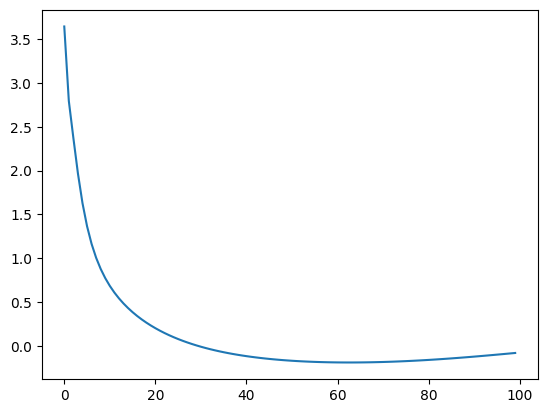

matrizErros[1][2]: 2.147954973578973
matrizErros[1][3]: 0.07683940790127979
matrizErros[1][4]: 1.9713273243821485
matrizErros[2][3]: 0.037450694386447284
matrizErros[2][4]: -2.879119432324042
matrizErros[3][5]: 2.466924629434892
matrizErros[4][5]: -10.129692784744641


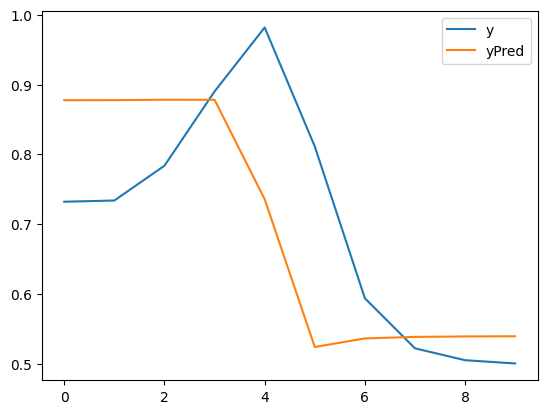

In [ ]:
plt.show()
plt.plot(erros)
plt.show()

print("matrizErros[1][2]:",  matrizErros[1][2])
print("matrizErros[1][3]:",  matrizErros[1][3])
print("matrizErros[1][4]:",  matrizErros[1][4])
print("matrizErros[2][3]:",  matrizErros[2][3])
print("matrizErros[2][4]:",  matrizErros[2][4])
print("matrizErros[3][5]:",  matrizErros[3][5])
print("matrizErros[4][5]:",  matrizErros[4][5])

yValues = [t[0] for t in predicoes]
yPredValues = [t[1] for t in predicoes]
plt.plot(yValues,label='y')
plt.plot(yPredValues, label='yPred')
plt.legend()
plt.show()

# Referências
- https://www.youtube.com/watch?v=II28i__Tf3M&list=PLZ3V9XyVA529kELNCTwtV46fTbpzHAcrd